In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook

In [2]:
from scipy import sparse
data = np.ones(4)
data

array([1., 1., 1., 1.])

In [3]:
row_indices = np.arange(4)
col_indices = np.arange(4)
row_indices
col_indices

array([0, 1, 2, 3])

array([0, 1, 2, 3])

In [4]:
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
eye_coo

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in COOrdinate format>

In [5]:
print("COO expression\n", eye_coo)

COO expression
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [6]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


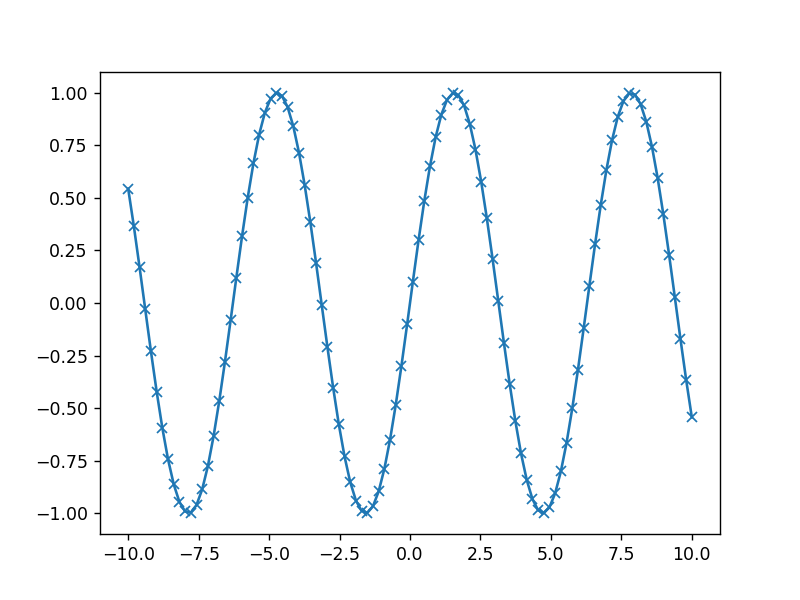

In [7]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x')

In [12]:
import pandas as pd

In [13]:
data = {"Name" : ["John", "Anna", "Peter", "Linda"],
       "Location" : ["New York", "Paris", "Berlin", "London"],
       "Age" : [24, 13, 53, 33]}

In [14]:
data_pandas = pd.DataFrame(data)

In [15]:
display(pd.DataFrame(data))

Name  Location  Age
0   John  New York   24
1   Anna     Paris   13
2  Peter    Berlin   53
3  Linda    London   33

In [16]:
display(data_pandas[data_pandas.Age > 30])

Name Location  Age
2  Peter   Berlin   53
3  Linda   London   33

In [19]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()# Bunch class object

In [20]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [24]:
#in DESCR, there is simple characteristics for datasets
print(iris_dataset['DESCR'][:250] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Informati
...


In [26]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [28]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [29]:
from sklearn.model_selection import train_test_split
# random_state=0 -> 랜덤. 75%, 25%로 split 하면 뒷 부분은 클래스 2 만 들어가기 때문에.
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [30]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


<IPython.core.display.Javascript object>


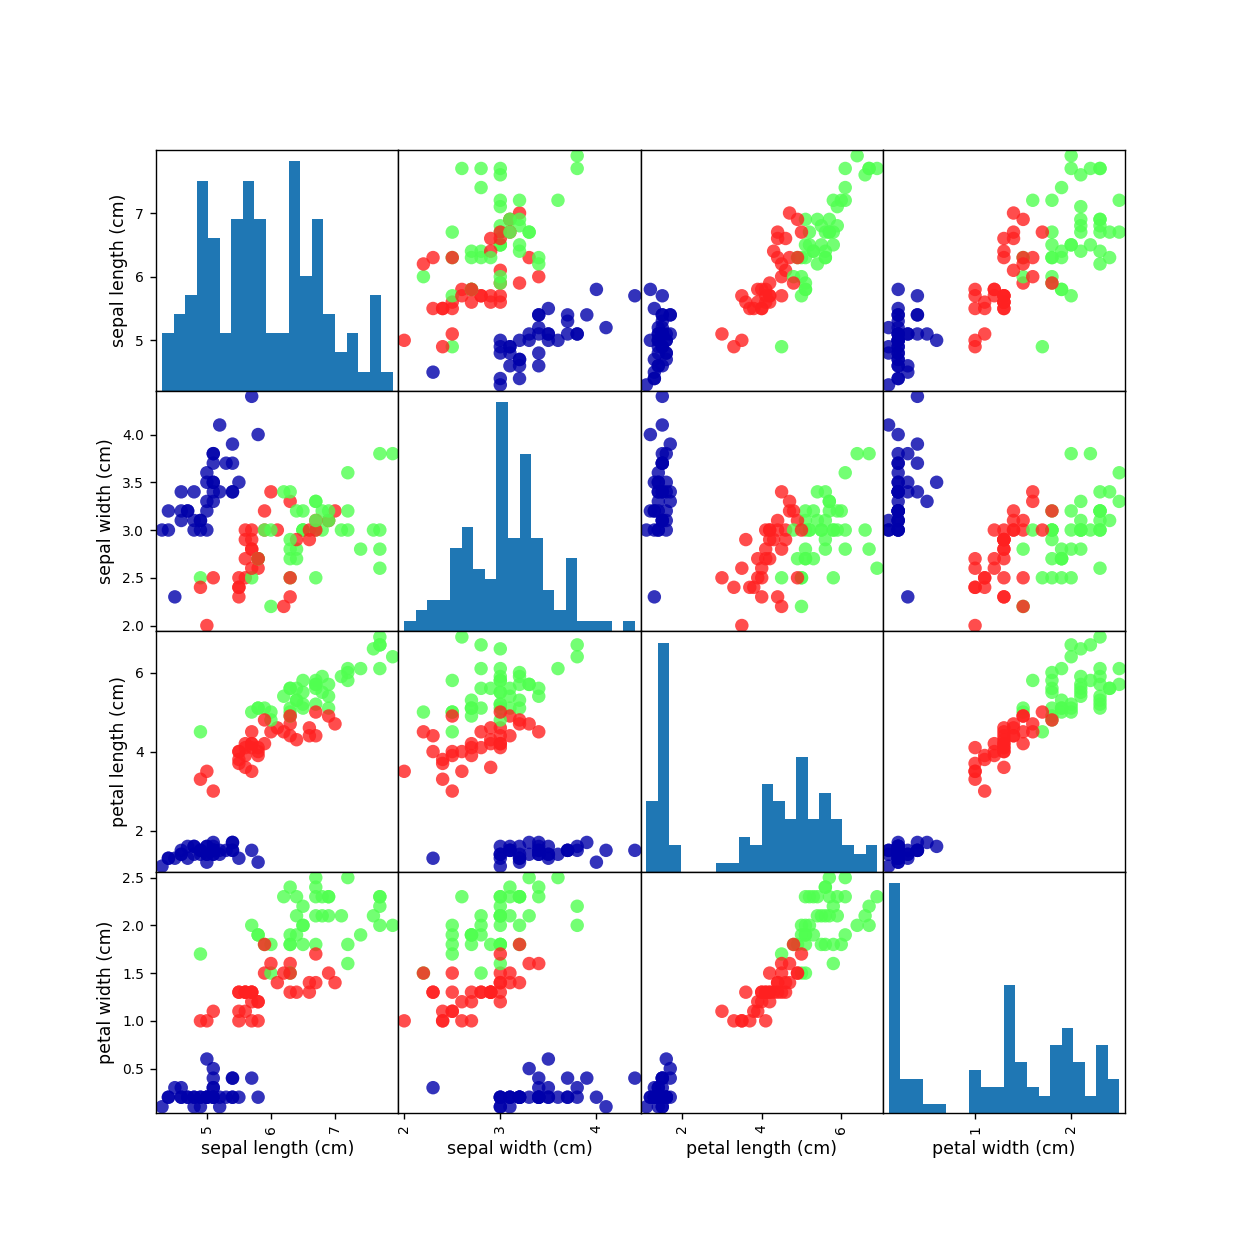

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

In [35]:
# 산점도 그리기 위해 numpy array를 pandas dataframe으로 변경 후 출력
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10,10), marker='o',
                          hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [36]:
# k-NN (k-Nearest Neighbors)
# sklearn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 구현되어 있다
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
# knn 객체의 fit 메소드를 통해 모델 생성
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
# 예측하기
# 임의의 데이터를 하나 만든다
# sklearn은 항상 데이터가 2차원 배열일 것으로 예상하므로 2차원 배열로 만든다.
X_new = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape)

(1, 4)


In [41]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [44]:
y_pred = knn.predict(X_test)
print("prediction for testset", y_pred)

prediction for testset [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [45]:
print("performance", np.mean(y_pred == y_test))

performance 0.9736842105263158


In [46]:
print("performance", knn.score(X_test, y_test))

performance 0.9736842105263158


In [51]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

print("performance", knn.score(X_test, y_test))

KNeighborsClassifier(n_neighbors=10)

performance 0.9736842105263158
